In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Objectives

The main objective of this EDA is to find out customer characteristics that would lead to a customer to convert (make purhcase). We would use these characteristics to suggest a more effcicient advertisement campaign to the marketing team.

In [65]:
#loading data
full_data = pd.read_csv('data/conversion_data.csv')

In [166]:
#taking a breif look at the data 
full_data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [167]:
full_data.shape

(316200, 6)

We can see that there are 5 independent variables and one response variable ('converted) in our data set. It also contains nearly three hundred thousands of observations. Let's Let's take a look at the distribution of our response variable. "converted".

## Response Variables

In [168]:
full_data.converted.value_counts()/full_data.shape[0] * 100

0    96.774194
1     3.225806
Name: converted, dtype: float64

This data set is highly imbalanced since only 3.22% of consumer converted. Let's start browsing the data set by go through the continous variables.

## Continous Variables

Before we can take a look at the distribution of the continous variable, we would need to modify the data type for variable "new_user" and "converted" as they are binary categorical variables.

In [169]:
full_data['new_user'] = full_data['new_user'].astype('category')
full_data['converted'] = full_data['converted'].astype('category')

In [170]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null category
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null category
dtypes: category(2), int64(2), object(2)
memory usage: 10.3+ MB


After correcting the data type for all variable, we see that this data set doesn't contain any missing information.

In [171]:
full_data.describe()

,age,total_pages_visited
count,316200.000000,316200.000000
mean,30.569858,4.872966
std,8.271802,3.341104
min,17.000000,1.000000
25%,24.000000,2.000000
50%,30.000000,4.000000
75%,36.000000,7.000000
max,123.000000,29.000000


We see that hte average age of the consumer is around 30 years old, and average total pages visted is around 5. Let's zoom into the distributions.

### Age

This varibale describes the age of customers who came to our website.

C:\Users\manunited890300\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


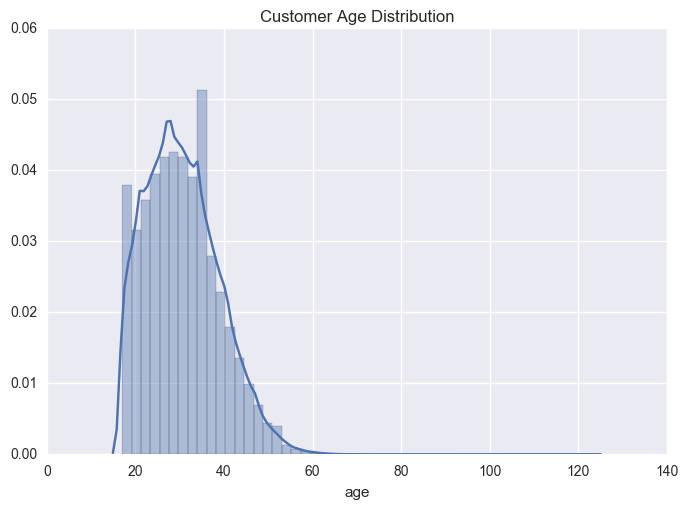

In [172]:
sns.distplot(full_data.age)
plt.title('Customer Age Distribution')

From the descriptive statistics we obtained above, we see that the 75th percentile of the age distribution is 75%, but we see the value extends to 120-ish on the histogram. We believe that there are outliers in this distribution, we need to find them and remove them.

In [176]:
age_outliers = full_data.age > 100
age_outliers.value_counts()

False    316198
True          2
Name: age, dtype: int64

There are two customers older than 100 year old, I highly doubt that is true. We will just remove them.

In [177]:
full_data = full_data[~age_outliers]

In [178]:
#confirming the row number is correct after removing two outliers
full_data.shape

(316198, 6)

Let's check the distribution again.

C:\Users\manunited890300\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


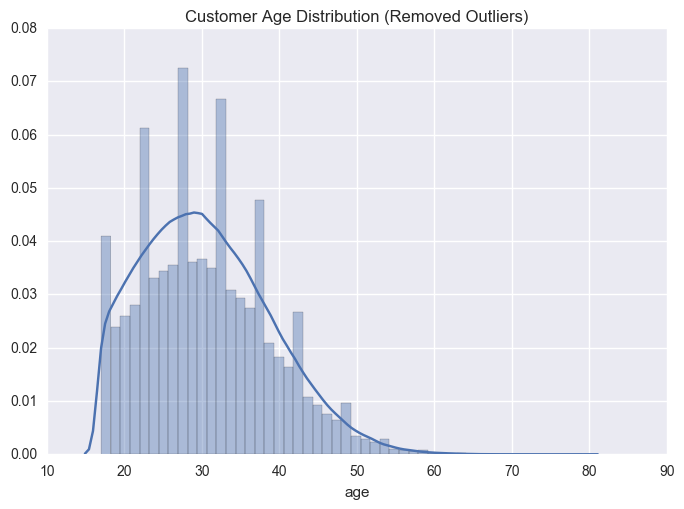

In [179]:
sns.distplot(full_data.age)
plt.title('Customer Age Distribution (Removed Outliers)')

Next, we would like to see how age is correlated with conversion rate.

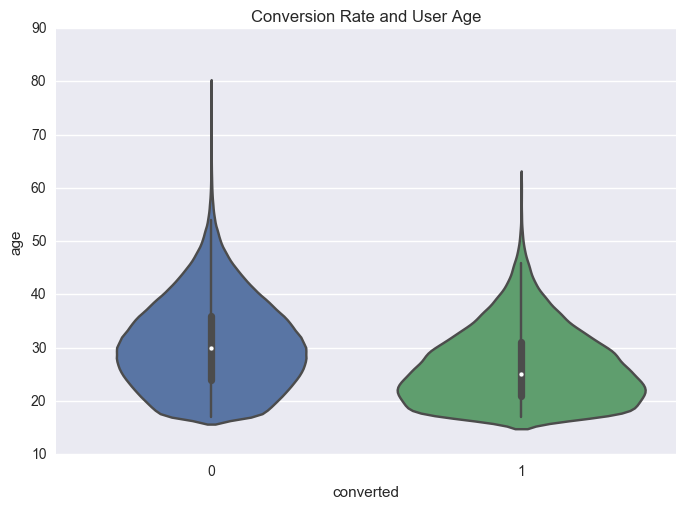

In [180]:
sns.violinplot(y = 'age', x = 'converted', data= full_data)
plt.title('Conversion Rate and User Age')

In [181]:
full_data.groupby('converted').age.describe()

converted       
0          count    306000.000000
           mean         30.703961
           std           8.275779
           min          17.000000
           25%          24.000000
           50%          30.000000
           75%          36.000000
           max          79.000000
1          count     10198.000000
           mean         26.529025
           std           6.937305
           min          17.000000
           25%          21.000000
           50%          25.000000
           75%          31.000000
           max          61.000000
Name: age, dtype: float64

Comparing the age distribution of users who converted and to those who did not, we could see the average age for those who did is less than those who didn't. Hence we can conclude that age should be a good indicator indicating if the users have a possibility to convert.

Next, we will move onto the other continous variable, "total_pages_visited".

## Total Pages Visited

This variable tells us how many time that a specific customer visited the page, no matter he/she converted or not.

C:\Users\manunited890300\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


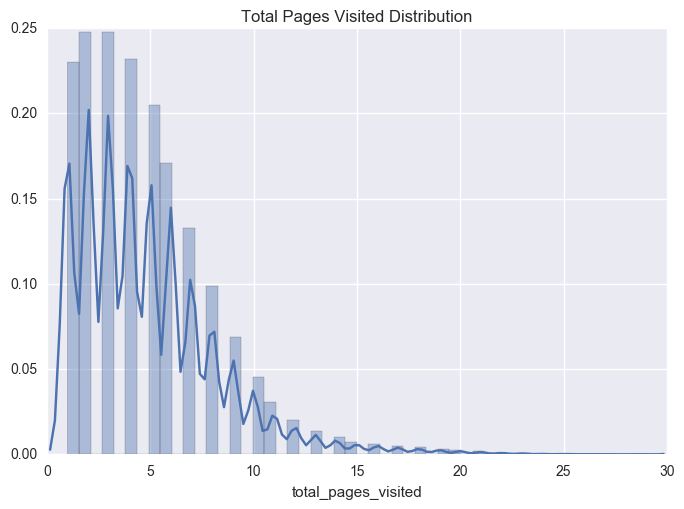

In [182]:
sns.distplot(full_data.total_pages_visited)
plt.title('Total Pages Visited Distribution')

The distribution of the total pages visited is right-skewed and because of the page visit was always an interger, that's why we see the histogram with this unique pattern. The max total page visited is 30, even though that is a big deviation from the median, we should not consider that as an outlier since to common sense, visiting a page for 30 times before making a purhcase is somewhat normal.

We would like to see if there is a major difference in total page visited comparing customers who converted and those who did not.

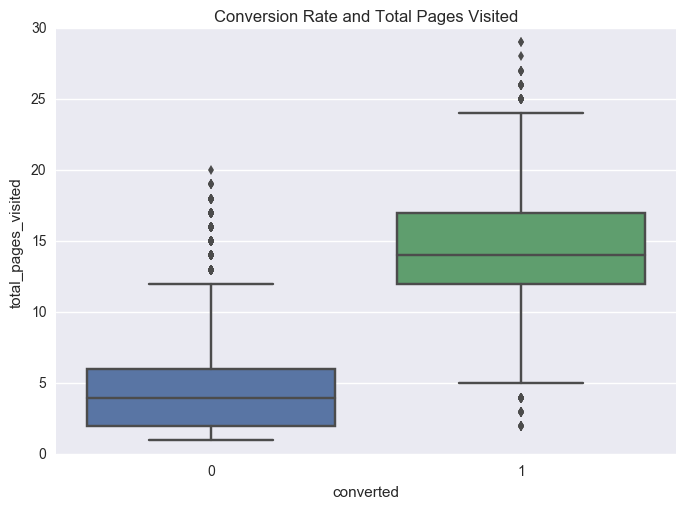

In [183]:
sns.boxplot(y = 'total_pages_visited', x = 'converted', data= full_data)
plt.title('Conversion Rate and Total Pages Visited')

In [184]:
full_data.groupby('converted').total_pages_visited.describe()

converted       
0          count    306000.000000
           mean          4.550281
           std           2.789910
           min           1.000000
           25%           2.000000
           50%           4.000000
           75%           6.000000
           max          20.000000
1          count     10198.000000
           mean         14.553932
           std           3.963522
           min           2.000000
           25%          12.000000
           50%          14.000000
           75%          17.000000
           max          29.000000
Name: total_pages_visited, dtype: float64

The difference between the median of those who converted and those who did not was huge. Customers who did not convert had a total pages visited median at 4, while those who converted had median at 14.

We would also like to look at thow does total pages visited correlate with age.

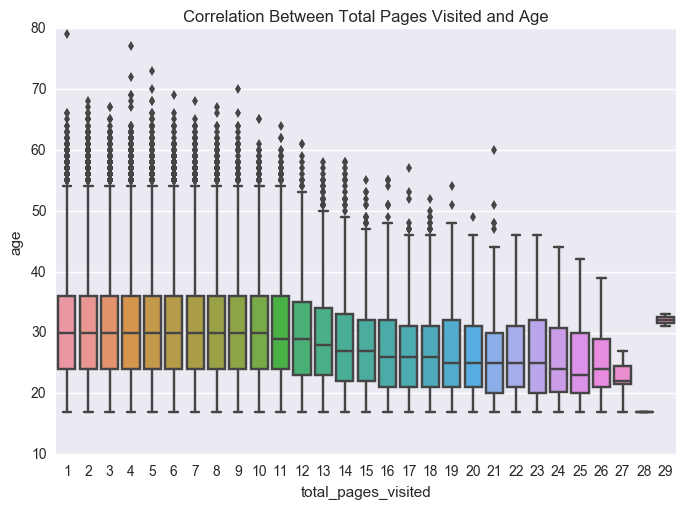

In [185]:
sns.boxplot(x = 'total_pages_visited', y = 'age', data= full_data)
plt.title('Correlation Between Total Pages Visited and Age')

Population of customer who visited the page from 1 to 10 times held a constant median in age around 30 years old; starting from 11 total pages visited, we observed that there is a downtrend in median age, which pretty much re-confirm what we observed earlier that customer who converted had younger age. **We should think about conveying the idea that we should only focus the advertising campaign on younger customers**, say, customers who were younger than 30 years of age.

After overviewing our continous variables, we would like to move onto the categorical variables of the data.

## Country

This variable describes user country based on the IP address.

In [18]:
full_data.country.value_counts()/full_data.shape[0] * 100

US         56.322937
China      24.225960
UK         15.322361
Germany     4.128742
Name: country, dtype: float64

More than half of the customers are from US, and nearly 25% of the customers are from China. It seems that the customer base is spreading around the world. It might be a good idea not to spread our advertising campaign's focus all around the world but focus in those that gave us the highest conversion rate. Let's take a look at which country has the highest conversion rate.

In [186]:
converted_country = full_data[full_data.converted == 1]

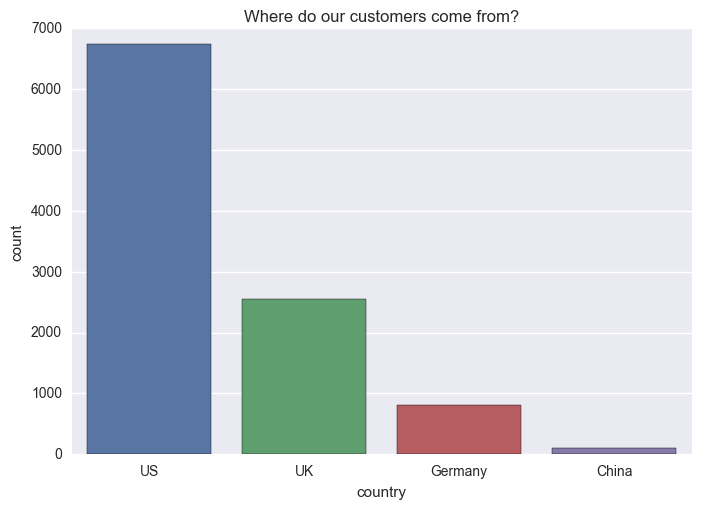

In [189]:
sns.countplot(converted_country.country)
plt.title('Where do our customers come from?')

Most of our customers (who are already in our database) are from US and UK.

In [190]:
full_data[full_data.converted == 1].country.value_counts()/full_data.country.value_counts() * 100

China      0.133156
Germany    6.242819
UK         5.261203
US         3.780069
Name: country, dtype: float64

Among the four countires, Germany has the highest conversion rate, beating UK by 1%. China has the lowest conversion rate less than 1%.  **Maybe the advertising campaign should be focusing more on UK and Germany, rather than focusing too much on China.**

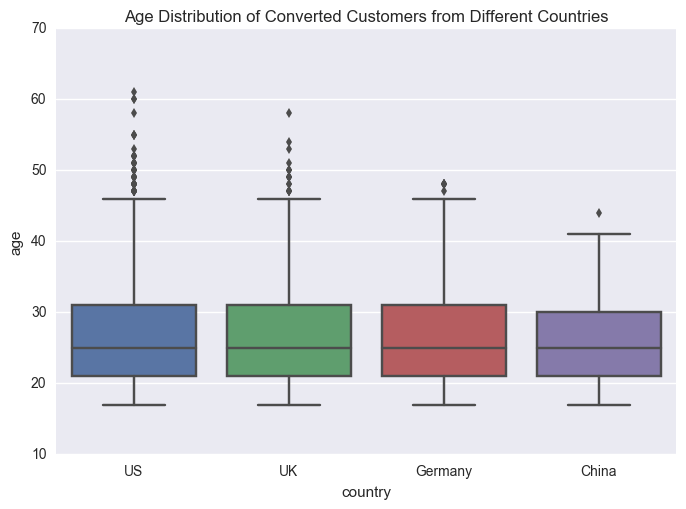

In [193]:
sns.boxplot(x = 'country', y = 'age', data = full_data[full_data.converted == 1])
plt.title('Age Distribution of Converted Customers from Different Countries')

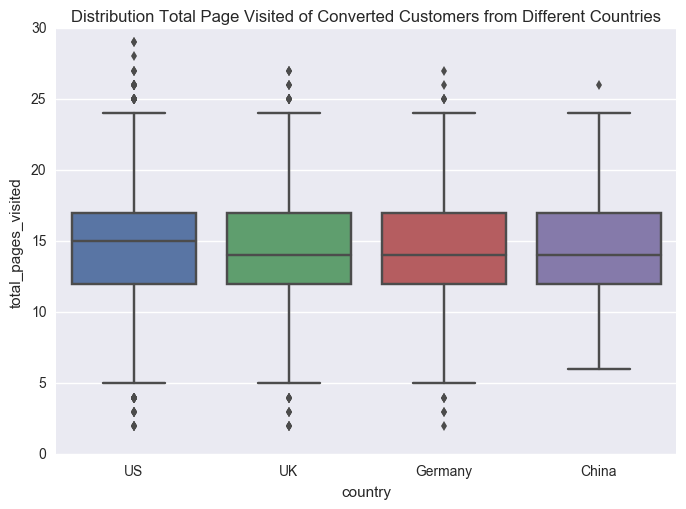

In [196]:
sns.boxplot(x = 'country', y = 'total_pages_visited', data = full_data[full_data.converted == 1])
plt.title('Distribution Total Page Visited of Converted Customers from Different Countries')

From box plots above, we can see that country has nothing to do with age of customer who converted and total pages visited from customers who converted.

## New User

This variable describes whether the user created the account during this session or had already an
account and simply came back to the site.

In [24]:
full_data.new_user.value_counts() / full_data.shape[0] * 100

1    68.546923
0    31.453077
Name: new_user, dtype: float64

Among all the users, 31.45% of them were new customers.

In [197]:
#what's the percentage that the new user convert
full_data[full_data.new_user == 1].converted.value_counts() / full_data[full_data.new_user == 1].shape[0] * 100

0    98.597885
1     1.402115
Name: converted, dtype: float64

In [198]:
#what's the percentage that the old user convert
full_data[full_data.new_user == 0].converted.value_counts() / full_data[full_data.new_user == 0].shape[0] * 100

0    92.801697
1     7.198303
Name: converted, dtype: float64

It's interesting to see that **old users had a much higher conversion rate compared to the new users.** One of the possible reasons could be that users who have made purhcase before on the website had positive experience toward the products they got recommended through the advertisment.

I think it would be reasonbale to suspect that old users who converted might have to visit less page before they make a purchase.

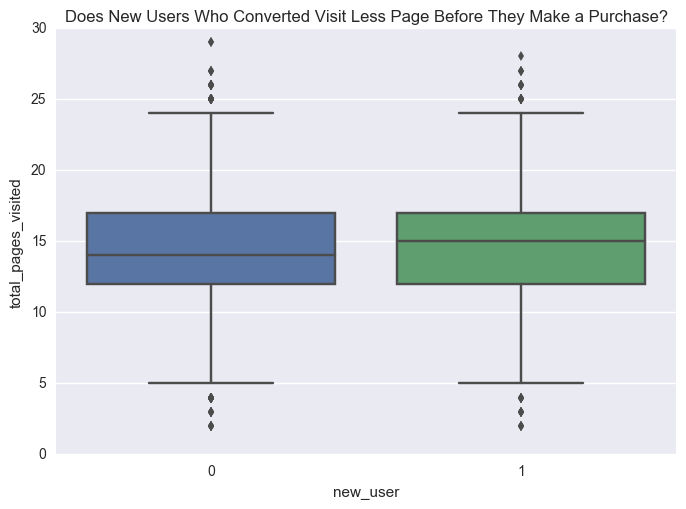

In [200]:
sns.boxplot(x = 'new_user', y = 'total_pages_visited', data = full_data[full_data.converted == 1])
plt.title('Does New Users Who Converted Visit Less Page Before They Make a Purchase?')

We can see the median of total pages visited for old user was around 13 times, while the median for the new user was 15. As the result, we can conclude that old user required less page visit before they make a purchase, but not very significant.

## Source 

This variable describes marketing channel source:

   - Ads: came to the site by clicking on an advertisement
   - Seo: came to the site by clicking on search results
   - Direct: came to the site by directly typing the URL on the browser

In [29]:
full_data.source.value_counts() / full_data.shape[0] * 100

Seo       49.032252
Ads       28.064377
Direct    22.903371
Name: source, dtype: float64

Nearly half of the customer in the data came to the site by clicking on search results (Seo). 28% of the customers came to the site by clicking on an ad (Ads). 23% of the customers came to the site by entering the URL directly on the browser (Direct).

In [30]:
full_data[full_data.converted == 1].source.value_counts() / full_data.source.value_counts() * 100

Seo       3.288850
Ads       3.447188
Direct    2.816901
Name: source, dtype: float64

Customers who came to the site by clicking the ad had the highest conversion rate, however, customer who came to the site by clicking the search result was pretty close to the "Ads" conversion rate too.

Let's start browsing the correlation between the continous variables and source; we would like to know for customer who converted, are there any relationship between the age and total pages visted among different sources. 

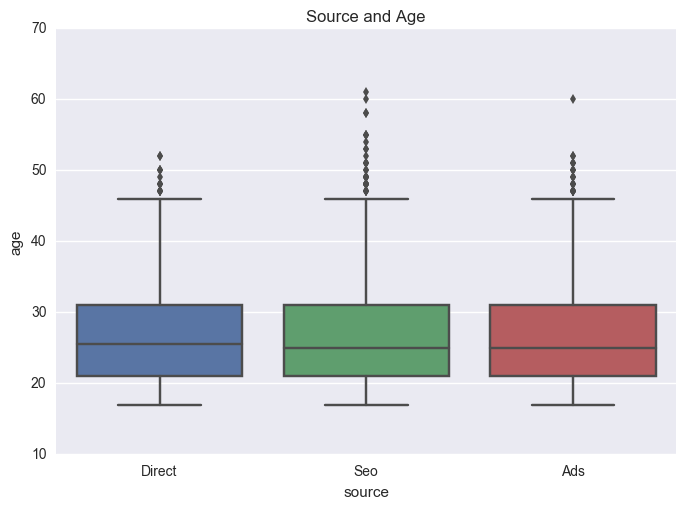

In [201]:
sns.boxplot(x = 'source', y = 'age', data = full_data[full_data.converted == 1])
plt.title('Source and Age')

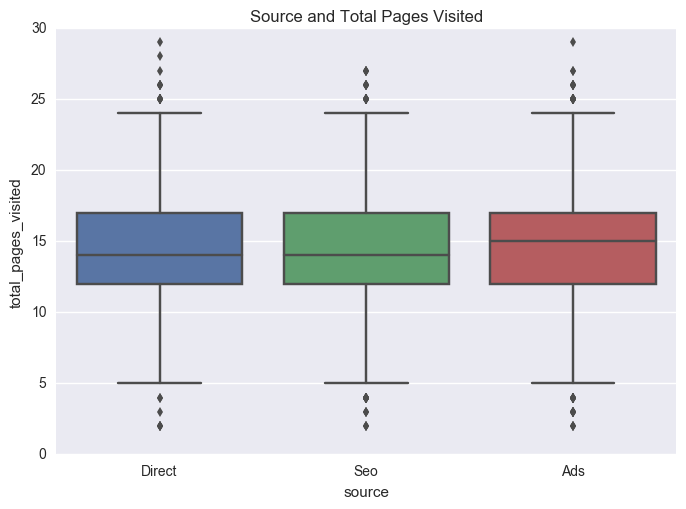

In [202]:
sns.boxplot(x = 'source', y = 'total_pages_visited', data = full_data[full_data.converted == 1])
plt.title('Source and Total Pages Visited')

As we can see, we couldn't spot any major differences in age or total pages visisted among different sources of customers who converted.

Next, we would try to find which source offered the highest converstion rate in all the countires.

In [203]:
tmp = full_data[full_data.converted == 1].groupby(['source', 'country']).converted.count() / full_data.groupby(['source', 'country']).converted.count() * 100

In [204]:
tmp = tmp.reset_index()

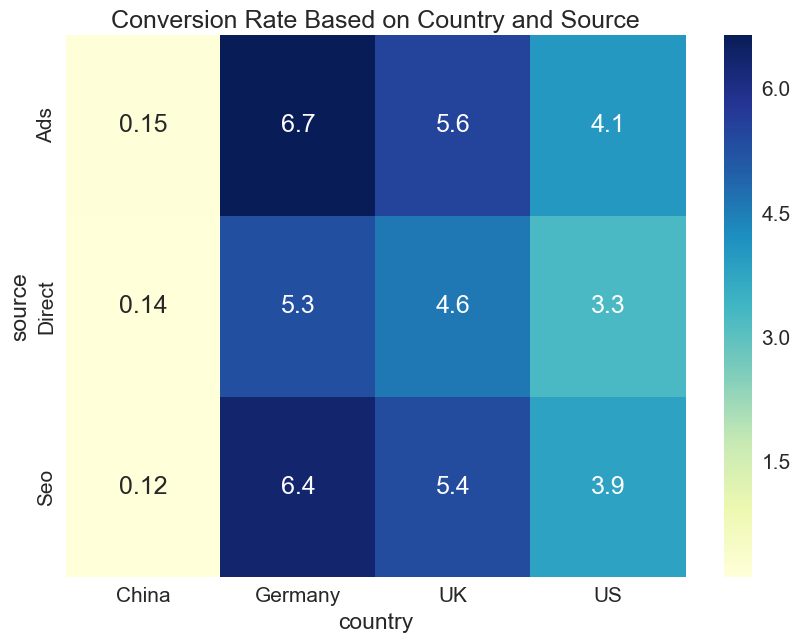

In [205]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.heatmap(tmp.pivot(columns='country', index= 'source', values='converted'), 
            annot=True, cmap="YlGnBu")
plt.title('Conversion Rate Based on Country and Source')

We see that in China, "Ads" offered the highest conversion rate. However, China has the lowest conversion rate among all countries (as we saw earlier), the marketing department should really consider if they should spend any resource in advertising in China. In other countries, we observed that "Ads" had the highest conversion rate.

Often time, conversion rate wouldn't be the only concern of the marketing team, they would also like to figure out the best way to expand customer base, as the result, we are interested in seeing which source could attract the most new customer.

In [206]:
full_data[full_data.new_user == 1].groupby('source').new_user.count() / full_data.shape[0] * 100

source
Ads       19.243955
Direct    15.731282
Seo       33.571686
Name: new_user, dtype: float64

**Among all the new customers, 33.57% of them came to the site by clicking on search results (Seo), and 19.24% came to the site through clicking Ads. **

In [37]:
full_data[full_data.converted == 1].groupby('source').new_user.count() / full_data[full_data.converted == 1].shape[0] * 100

source
Ads       29.996078
Direct    20.003922
Seo       50.000000
Name: new_user, dtype: float64

**Among all those new customers who converted, 50% of them came from "Seo" and 30% of them came from "Ads"**

## Summary Before Deploying Machine Learning

Based on our above observations, we can summarize a few points:
    1. Customers who converted tend to have a younger age (<30 yrs old)
    2. Customers who converted tend to browse more pages before they convert ( >= 14 pages), while customers did not convert visited around 4 pages.
    3. We see that customers who visited pages more than 11 times tend to be younger.
    4. Most customers are from US and UK.
    5. Germany has the highest conversion rate among all (6.24%).
    6. Most users who converted were old users.
    7. Nearly half of the customer in the data came to the site by clicking on search results (Seo), it also attracted the most new users among all the sources.
    8. "Ads" was the source that had the highest conversion rate in all the countires.
    9. "Seo" was the best source to convert new customers.
    
So what should the marketing deparment do? In my perspective, the first thing they should do is to expand the current customer base. From the data we observed that "Seo" was the most efficient way to attract new customers, as the result, the marketing team should invest more advertisment resource in major searhc engines like Google, so when potential customers searched the products they want, our website would be on the first page. 

The second thing that I would suggest to the marketing team would be focus more on customer population that is younger than 30 years old, as we found that converted customers tend to be younger. In addition, given the fact that countries like Germany and UK had much higher conversion rate, I would suggest that the marketing team lauch advertisement campaign on the younger population in these countries.

Lastly, we see that China was the country that yielded the lowest conversion rate, I would suggest the marketing team to consider invest less resource on China's customers. However, if the marketing team deems China to be a potential major market, which it is the case in many aspect, we should investigate the reason why China had much less conversion rate compared to the other countires. It could be the products we have are not attractive to Chinese customers, or our competitors in China offered a cheaper cost and faster delivery time.

## Rule Learning

Now that we summarized our findings and suggestions, we would like to use machine learning to get some rules in predicting if a customer would convert or now. We will get into predictive modeling more in-depth next section, our goal here is just to look for some simple rules.

Before we proceed further, we would need to transform our categorical variables into numbers using one-hot encoding.

In [71]:
cat_feat = ['country', 'source']

In [73]:
cat_df = pd.get_dummies(full_data[cat_feat])

In [80]:
num_df = full_data.select_dtypes(include='int64').copy()

In [83]:
full_data = pd.concat([cat_df, num_df], axis=1)

In [103]:
df= full_data.iloc[:,0:10]
y= full_data.converted


dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

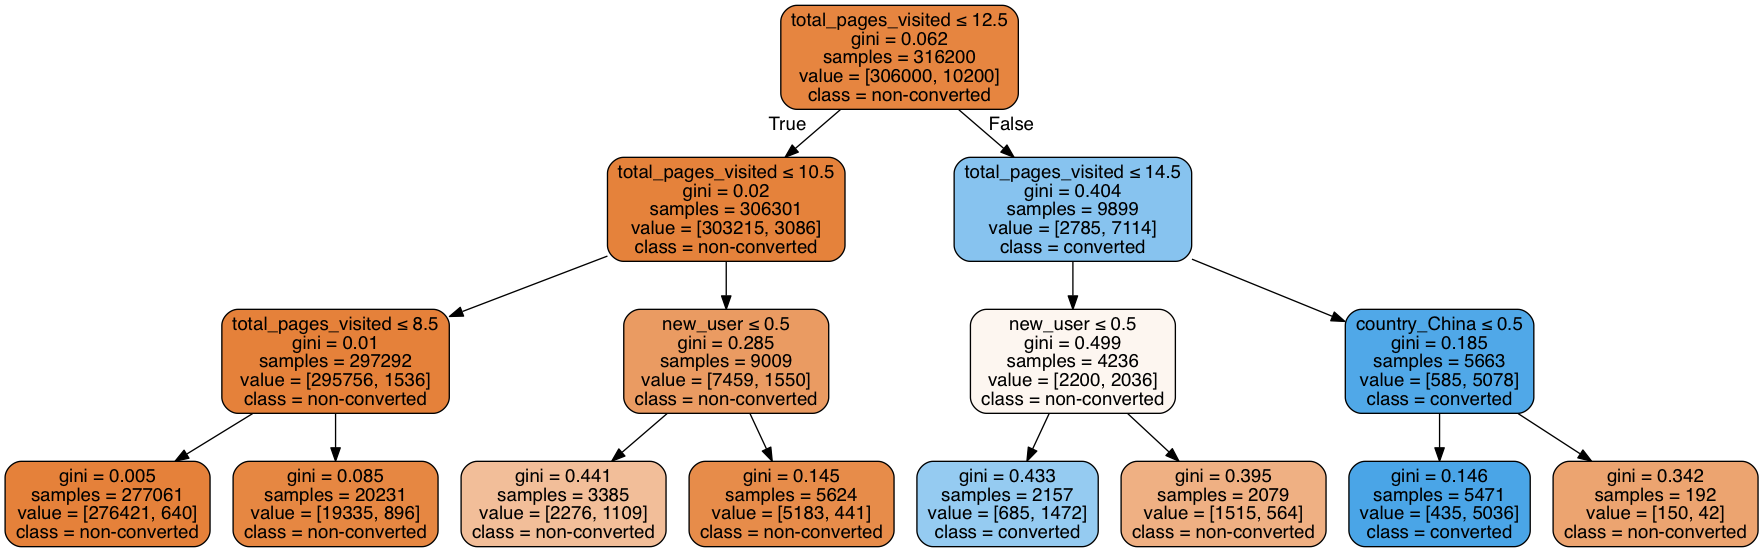

In [105]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                feature_names= df.columns,
                class_names= ['non-converted', 'converted'],
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Reading our decision tree from the top to bottom, we see that the most important feature that the algorithm picked to determine conversion was "total_pages_visited"; if a specific user viewed less or equal to 12.5 pages, that user would not convert. In the next level of the tree, we see that if the customer was an old customer and viewed more than 12.5 pages but less than or equal to 14.5 pages, that specific customer would convert. In addtion, if a customer viewed more than 14.5 pages and not from China, that customer would convert.

In the next section, we will starting applying predicitive modeling to this data and predict if a specific customer would convert given all the information above.